# Comparison of Classifiers for the Breast Cancer Prediction

In this assignment we have been given the task to create a Decision Tree Classifier and a Naive Bayes Classifier, and compare the results of the two, from the given dataset.

### *The dataset*
We have been given the dataset Breast Cancer Prediction dataset. It contains data from cell nucleus in breast tissue, which is designed to assist diagnosing breastcancer. Here is an overview of the given dataset.

 - Consists of 569 instances/observations.
    - Class distribution: 357 benign (62.74%), 212 malignant (37.76%)

 - Has 30 numerical features. Excluding ID and diagnosis.

 - The features are real, meaning they will consist of floating point numbers.
 
 - Classification problem, where the goal is to classify cancer tumours, based on cell properties.


#### *What is the purpose of this dataset?*
The purpose of this dataset is as mentioned before, using data from cell nucleus in breast tissue to assist diagnosing breastcancer.

#### *What are the features?*
The features are numeric values that describe different properties of the tumor. Such as texture, radius, smoothness and etc.

#### *What are the targets?*
M and B, will act as our boolean outputs/targets. Where B is benign, which will act as our boolean 0. The M is malignant, the opposite of the benign, will act as our boolean 1.

In other words, it can be simplified to as follows. B is for when the tumor is benign, and M is when tumor is malignant.


In [237]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

In [238]:
dataset = pd.read_csv('wdbc.data', sep=",", header=None)
dataset.drop(columns=[0], inplace=True)
dataset[1] = dataset[1].map({'M': 1, 'B': 0})
dataset.head(5)


,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>,
        <Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>, <Axes: title={'center': '6'}>],
       [<Axes: title={'center': '7'}>, <Axes: title={'center': '8'}>,
        <Axes: title={'center': '9'}>, <Axes: title={'center': '10'}>,
        <Axes: title={'center': '11'}>, <Axes: title={'center': '12'}>],
       [<Axes: title={'center': '13'}>, <Axes: title={'center': '14'}>,
        <Axes: title={'center': '15'}>, <Axes: title={'center': '16'}>,
        <Axes: title={'center': '17'}>, <Axes: title={'center': '18'}>],
       [<Axes: title={'center': '19'}>, <Axes: title={'center': '20'}>,
        <Axes: title={'center': '21'}>, <Axes: title={'center': '22'}>,
        <Axes: title={'center': '23'}>, <Axes: title={'center': '24'}>],
       [<Axes: title={'center': '25'}>, <Axes: title={'center': '26'}>,
        <Axes: title={'center': '27'}>, <Axes: title={'center': '28'}

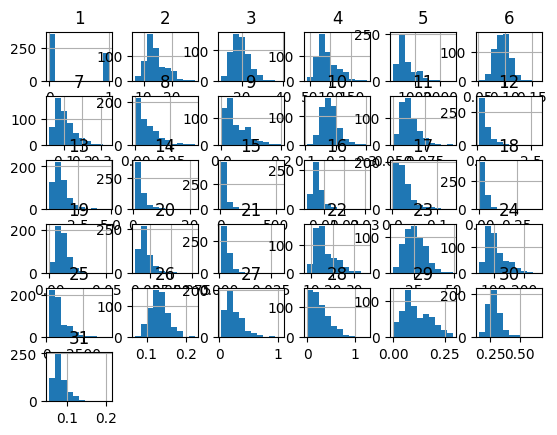

In [239]:
dataset.hist()

## Pre-prossesing of data
Since this is a .data file and not a .csv file, the first row is now a "header" for the other coloums. We can fix this by setting header=None.

Our pre-prossesing will consist of removing the ID, since it's not relevant for us. So we will use dataset.drop(columns=[0], inplace=True) to remove the ID coloumn.

Additionally, we are remapping our B and M features to boolean features to provide more clarity, and it will most likely help, later on.





## Splitting the dataset


### *Choosing the sampling technique*

The chosen sampling tehcniquie will we be using stratified sampling. 

We want to maintain our proportion of classes in our splits. Each split will become a 'smaller verison' of our whole dataset. This sampling technique will ensure that each split will have the same ratio of both cases(Malignant to benign cases) as in the full dataset. 

In other words, we want to assure that we avoid situations where, by chance, one of the splits gets too many of one class. 

There was an attempt in using random sampling technique, however the results affected the validation precision and recall to an extent that made them unusable. Therefore we will use stratified sampling going forward.

### *The 60/20/20 split*
My approach to the splitting of the dataset will be a 60/20/20 split. Reason for this is that model reliabilty is crucial in our case. Therefore choosing 60/20/20 split will provide better balance between training and evaluation. This should also enhance our ability to prevent overfitting. In other words, we wants our evaluation to be thourough and the model to be able to generalize well to new data. 

- 60% for training
  - This will ensure the model has enough data to learn from. In other words, it should be sufficient enough to capture the patterns and complexities within the data.

- 20% for validation
  -  This allow us to tune our hyperparamaters and make decisions according to our performance, without overfitting to the training data.

- 20% for testing
  - This will be used for having an unbiased evaluation of the models performance. This occurs after the training and the validation, to ensure its evaluating data it has not seen before.

### *Comparing our split choice with the 80/10/10 split*

When arriving at the question of choosing the correct split, it stood between two options. Either the 60/20/20 split or 80/10/10. So to elaborate why I didnt choose the 80/10/10, boils down to that the split is relevant for when the scenario is about maximizing the training data, which is not our desired goal.  


### *Defending the chosen 60/20/20 split*

Why I think this is a good approach is that there will be sufficent data for the training to yield good results, without overfitting. It has a balanced evaluation which provides flexibility and reliability. 

In [240]:
# Making our 60/20/20 split

# Split off 20% for testing
train_validation, test = train_test_split(dataset, test_size=0.2, stratify=dataset[1], random_state=42)

# Split the remaining 80% into 75% train (60% of total) and 25% validation (20% of total)
train, validation = train_test_split(train_validation, test_size=0.25, stratify=train_validation[1], random_state=42)


#This approach was inspired from the book: Machine learning for absolute beginners 2017 page 126. With added stratify sampling.

In [241]:
train_features = train.drop(columns=[1])                    #Defining our training features
train_target = train[1]                                     #Defining our training target

validation_features = validation.drop(columns=[1])          #Defining our vailidation features
validation_target = validation[1]                           #Defining our vailidation target

test_features = test.drop(columns=[1])                      #Defining our test features
test_target = test[1]                                       #Defining our test target

In [242]:
# Adding max_depth to limit the complexity, a random seed to reproduce the randomness, and a minimum samples per split to also help with overfitting
decision_tree_model1 = DecisionTreeClassifier(max_depth=5,random_state=42, min_samples_split=5)  

decision_tree_model1.fit(train_features, train_target)

DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42)

In [243]:
decision_tree_model1.score(validation_features, validation_target)


0.8947368421052632

In [244]:
def evaluate(model, final_eval=False):

    # Store the predictions

    train_predictions = model.predict(train_features)
    validation_predictions = model.predict(validation_features)

    # Print the training and validation scores

    print(f'Training Accuracy: {accuracy_score(train_target, train_predictions)}')
    print(f'Training Precision: {precision_score(train_target, train_predictions)}')
    print(f'Training Recall: {recall_score(train_target, train_predictions)}')
    print(f'Validation Accuracy: {accuracy_score(validation_target, validation_predictions)}')
    print(f'Validation Precision: {precision_score(validation_target, validation_predictions)}')
    print(f'Validation Recall: {recall_score(validation_target, validation_predictions)}')
    
    # Evaluate and print the final test scores if final_eval is True
    
    if final_eval:
        test_predictions = model.predict(test_features)

        print(f'Test Accuracy: {accuracy_score(test_target, test_predictions)}')
        print(f'Test Precision: {precision_score(test_target, test_predictions)}')
        print(f'Test Recall: {recall_score(test_target, test_predictions)}')

In [245]:
evaluate(decision_tree_model1)

Training Accuracy: 0.9853372434017595
Training Precision: 0.9841269841269841
Training Recall: 0.9763779527559056
Validation Accuracy: 0.8947368421052632
Validation Precision: 0.8444444444444444
Validation Recall: 0.8837209302325582
